# Dataset Preview

### Notebook utilizado para pré visualização dos dados de exame

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

#Definindo padrões de plot domínio do tempo
plot_kwargs = {
    'scalings': dict(eeg=20e-5),
    'show_scrollbars': False,
}

In [15]:
import database.databaseutils as db
import model.summarymodelconverter as converter

db.connect()

db_object = db.summary_by_name('chb09_08.edf')
summary_model = converter.model_from_tuple( db_object )
summary_model.generate_psd()
summary_model.generate_spectogram()

Extracting EDF parameters from c:\Users\luiza\Desktop\Mestrado\Trabalho\data\chb09\chb09_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


c:\Users\luiza\Desktop\Mestrado\Trabalho\reader\mnereader.py:21: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  mne_model = mne.io.read_raw_edf(summary_model.fullpath(), include=commons.selected_channels())


Effective window size : 8.000 (s)


In [16]:
summary_model.signal

<RawEDF | chb09_08.edf, 19 x 3686400 (14400.0 s), ~20 kB, data not loaded>

In [23]:
import mne
edf_raw_object = summary_model.signal

all_events, all_event_id = mne.events_from_annotations(edf_raw_object)

metadata, events, event_id = mne.epochs.make_metadata(
    events=all_events,
    event_id=all_event_id,
    tmin=0,
    tmax=30,
    sfreq=edf_raw_object.info["sfreq"],
)

# epochs = mne.Epochs( raw=edf_raw_object,
#                      tmin=0,
#                      tmax=summary_model.duration(),
#                      events=events,
#                      event_id=event_id,
#                      metadata=metadata,
#                      baseline=(0, 0) )

# epochs

Used Annotations descriptions: ['Anomaly - 0', 'Anomaly - 1']


<Annotations | 2 segments: Anomaly - 0 (1), Anomaly - 1 (1)>

Using matplotlib as 2D backend.


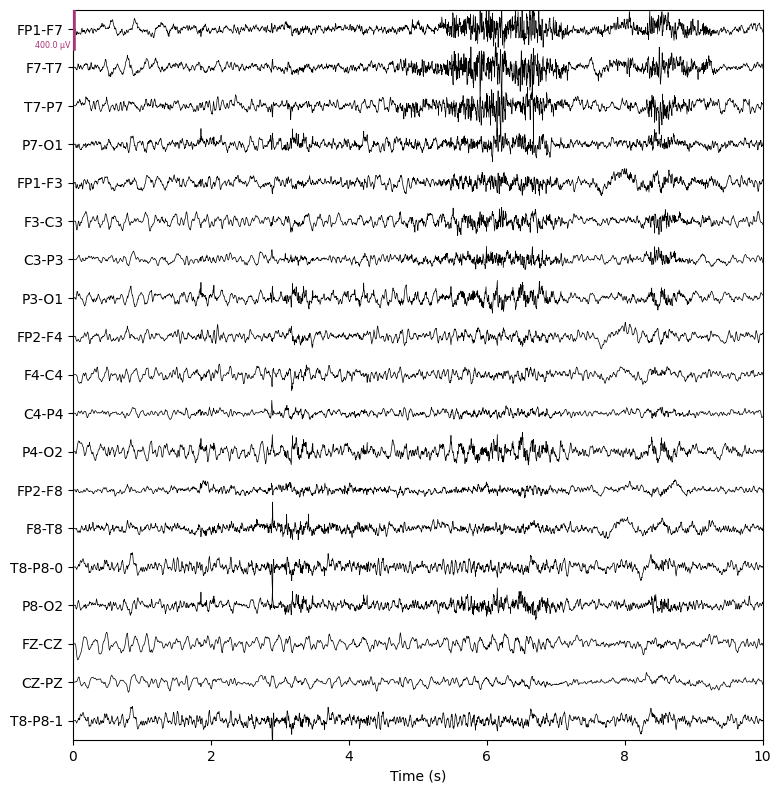

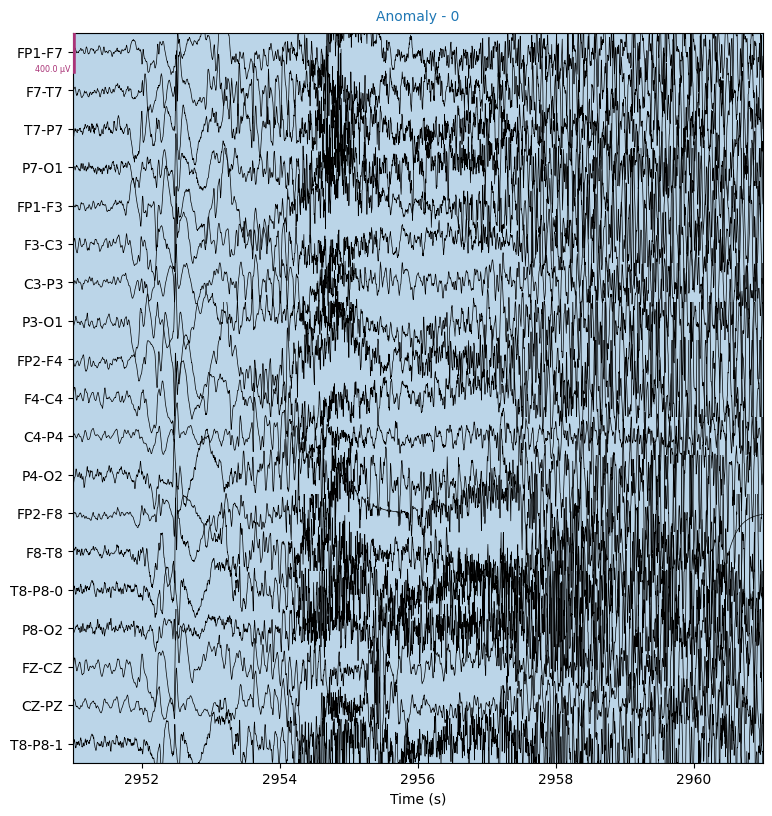

In [18]:
summary_model.signal.plot(start=0, **plot_kwargs);
summary_model.signal.plot(start=summary_model.start_time_of_seizure(1), **plot_kwargs);

In [ ]:
summary_model.psd

In [ ]:
summary_model.psd.plot();

In [ ]:
summary_model.spectogram

In [ ]:
summary_model.spectogram.plot();

In [ ]:
import model.summarymodelconverter as converter

summary_model_renamed = converter.model_from_tuple( db_object, True )
summary_model_renamed.generate_psd()
summary_model_renamed.generate_spectogram()

In [ ]:
summary_model_renamed.signal

In [ ]:
summary_model_renamed.signal.plot(start = 50, **plot_kwargs);
summary_model_renamed.signal.plot(start=summary_model.start_time_of_seizure(1), **plot_kwargs);

In [ ]:
summary_model_renamed.psd

In [ ]:
summary_model_renamed.psd.plot();

In [ ]:
summary_model_renamed.spectogram

In [ ]:
summary_model_renamed.spectogram.plot();